# Project Title :
-- Academic Performance & Student Behavior Insights
### Project Overview :
-- The goal is to understand what factors most influence student academic performance and provide actionable insights for educators and policymakers to improve student outcomes.
### Problem Statement
What factors impact student academic performance the most, and how can schools use data-driven insights to improve grades and engagement?


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Loading the Dataset
### Description

This dataset includes student-level data about their demographic background, school performance, study time, family situation, and alcohol consumption. It allows exploration of academic performance predictors and behavioral patterns.

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Initial Exploration

In [18]:
df.size    # checking the size of the dataset 

15000

In [19]:
df.shape   # checking the shape of the dataset 

(1000, 15)

In [20]:
df.nunique()  # checking the count of unique values in each column

gender                  2
race_ethnicity          5
parental_education      6
lunch                   2
test_preparation        2
math_score             81
reading_score          72
writing_score          77
average_score         194
alchol_consumption      3
family_support          2
internet_access         2
avg_studytime(hrs)      4
grade                   6
absent_percent         51
dtype: int64

In [ ]:
df.isnull().sum()    # checking the sum of null values in each column

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              1000 non-null   object 
 1   race_ethnicity      1000 non-null   object 
 2   parental_education  1000 non-null   object 
 3   lunch               1000 non-null   object 
 4   test_preparation    1000 non-null   object 
 5   math_score          1000 non-null   int64  
 6   reading_score       1000 non-null   int64  
 7   writing_score       1000 non-null   int64  
 8   average_score       1000 non-null   float64
 9   alchol_consumption  1000 non-null   object 
 10  family_support      1000 non-null   object 
 11  internet_access     1000 non-null   object 
 12  avg_studytime(hrs)  1000 non-null   int64  
 13  grade               1000 non-null   object 
 14  absent_percent      1000 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 117.3+ 

In [22]:
df.dtypes

gender                 object
race_ethnicity         object
parental_education     object
lunch                  object
test_preparation       object
math_score              int64
reading_score           int64
writing_score           int64
average_score         float64
alchol_consumption     object
family_support         object
internet_access        object
avg_studytime(hrs)      int64
grade                  object
absent_percent          int64
dtype: object

In [23]:
df.describe()

,math_score,reading_score,writing_score,average_score,avg_studytime(hrs),absent_percent
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580,4.768000,22.175000
std,15.16308,14.600192,15.195657,14.257311,1.845422,11.095742
min,0.00000,17.000000,10.000000,9.000000,2.000000,0.000000
25%,57.00000,59.000000,57.750000,58.330000,4.000000,14.000000
50%,66.00000,70.000000,69.000000,68.330000,4.000000,21.000000
75%,77.00000,79.000000,79.000000,77.670000,6.000000,30.000000
max,100.00000,100.000000,100.000000,100.000000,8.000000,50.000000


In [24]:
df.duplicated().sum()

np.int64(0)

# Renaming the columns

In [3]:
df.rename(columns={
    'race/ethnicity': 'race_ethnicity',
    'parental level of education': 'parental_education',
    'test preparation course': 'test_preparation',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
}, inplace=True)

df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Adding new columns 

In [4]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1).round(2)
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [25]:
# Adding new column - alcohol_consumption( low / moderate / high)

def alcohol_consumption(score):
    if score >= 70:
        return 'Low'
    elif 30 <= score < 70:
        return 'Moderate'
    else:
        return 'High'

df['alchol_consumption'] = df['average_score'].apply(alcohol_consumption)
df.head()


,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alchol_consumption,family_support,internet_access,avg_studytime(hrs),grade,absent_percent
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes,Yes,6,C,11
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes,Yes,6,B,11
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes,Yes,8,A,10
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No,No,2,F,48
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes,Yes,6,C,16


In [6]:
# Adding new column - family_support (yes/no)

def family_support(score):
    if score >= 70:
        return 'Yes'
    else:
        return 'No'

df['family_support'] = df['average_score'].apply(family_support)
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alchol_consumption,family_support
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes


In [8]:
# Adding new column - internet_access(yes/no)

def internet_access(score):
    return 'Yes' if score >= 60 else 'No'

df['internet_access'] = df['average_score'].apply(internet_access)
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alchol_consumption,family_support,internet_access
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes,Yes
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes,Yes
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes,Yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No,No
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes,Yes


In [9]:
# Adding new column - study_time_hours (hours between 2 and 8 based on score)

def study_time(score):
    if score >= 85:
        return 8
    elif score >= 70:
        return 6
    elif score >= 55:
        return 4
    else:
        return 2

df['avg_studytime(hrs)'] = df['average_score'].apply(study_time)
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alchol_consumption,family_support,internet_access,avg_studytime(hrs)
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes,Yes,6
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes,Yes,6
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes,Yes,8
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No,No,2
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes,Yes,6


In [10]:
# Adding new column -  grade (A /B /C /D /E /F) based on the avg_score

def grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    elif score >= 50:
        return 'E'
    else:
        return 'F'

df['grade'] = df['average_score'].apply(grade)
df.head()


,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alchol_consumption,family_support,internet_access,avg_studytime(hrs),grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes,Yes,6,C
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes,Yes,6,B
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes,Yes,8,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No,No,2,F
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes,Yes,6,C


In [16]:
# Adding new column -  absent_percentage based on the avg_score

def absent_percent(score):
    if score >= 85:
        return random.randint(0, 10)
    elif score >= 70:
        return random.randint(10, 20)
    elif score >= 50:
        return random.randint(20, 35)
    else:
        return random.randint(35, 50)

df['absent_percent'] = df['average_score'].apply(absent_percent)
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alchol_consumption,family_support,internet_access,avg_studytime(hrs),grade,absent_percent
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes,Yes,6,C,11
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes,Yes,6,B,11
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes,Yes,8,A,10
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No,No,2,F,48
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes,Yes,6,C,16


## Now we have our dataset with all the necessary columns
-- Now after completing all the initial steps of data loading , understanding , cleaning , renaming and adding new colmuns we have our cleaned dataset.

In [26]:
 df.to_csv('cleaned_std_perf.csv', index=False)


 # Univariate Analysis
-- In particular, we will:

- Analyze the numerical columns using histograms and summary statistics

- Analyze the categorical columns using countplots

- Use boxplots to visually check for outliers in the numerical columns

math_score Summary:
count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64


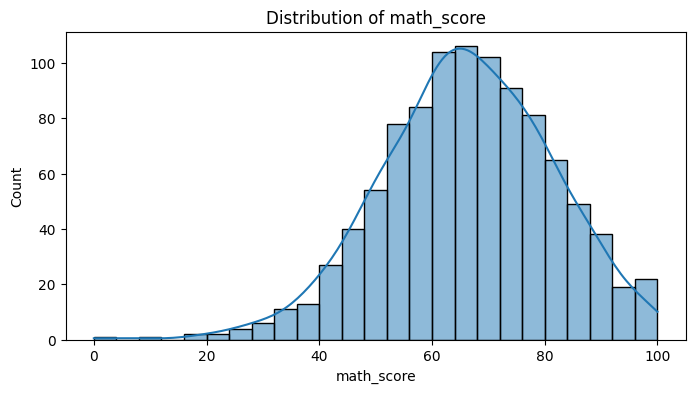

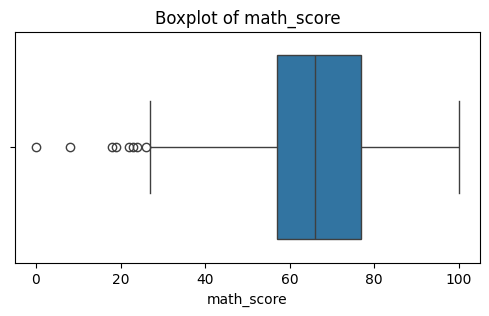

reading_score Summary:
count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64


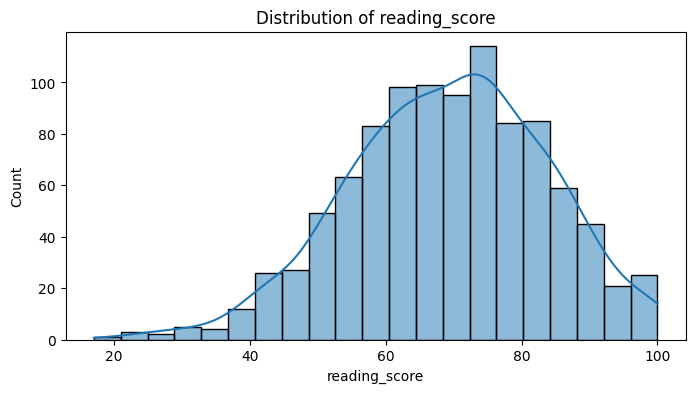

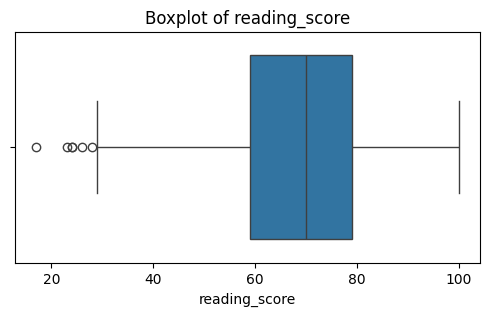

writing_score Summary:
count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64


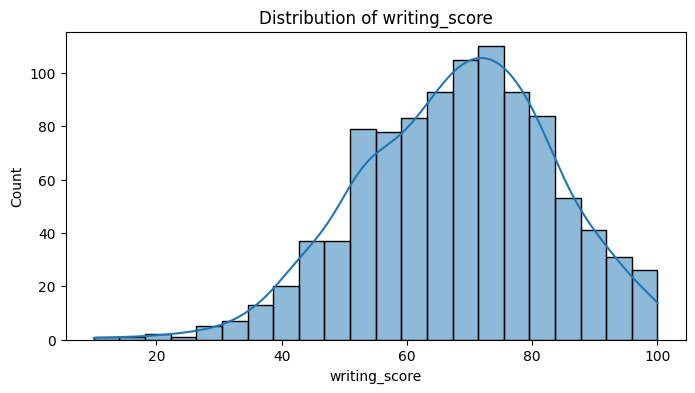

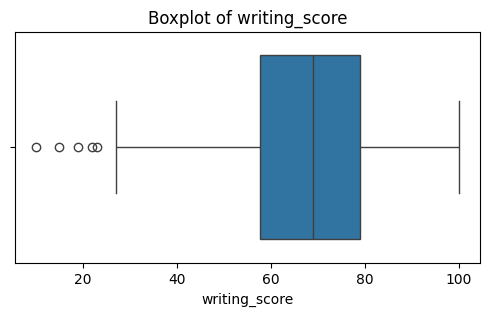

average_score Summary:
count    1000.000000
mean       67.770580
std        14.257311
min         9.000000
25%        58.330000
50%        68.330000
75%        77.670000
max       100.000000
Name: average_score, dtype: float64


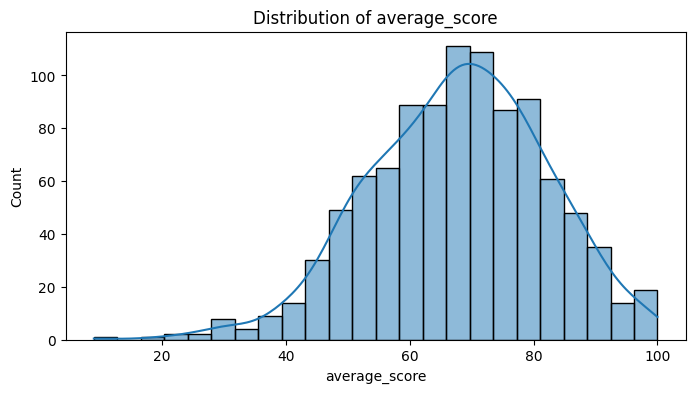

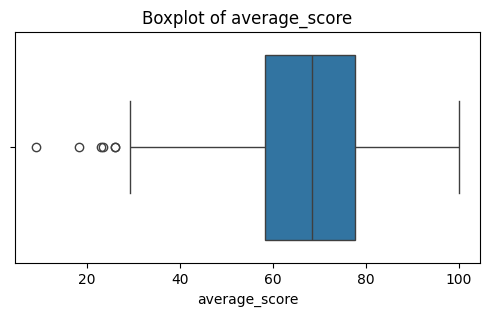

avg_studytime(hrs) Summary:
count    1000.000000
mean        4.768000
std         1.845422
min         2.000000
25%         4.000000
50%         4.000000
75%         6.000000
max         8.000000
Name: avg_studytime(hrs), dtype: float64


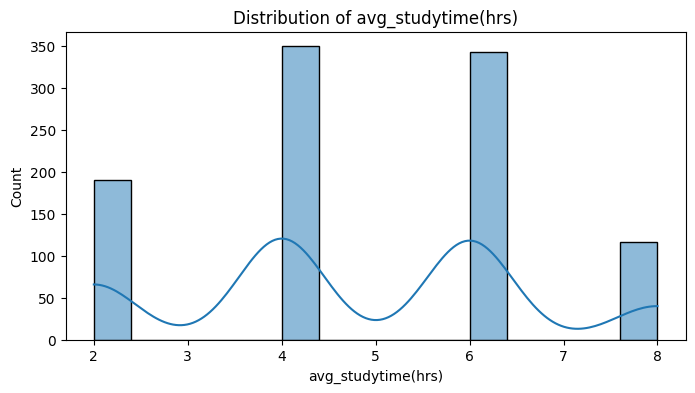

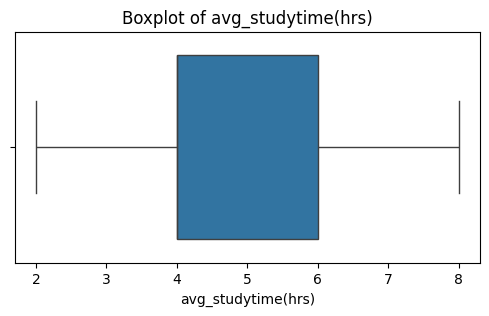

absent_percent Summary:
count    1000.000000
mean       22.175000
std        11.095742
min         0.000000
25%        14.000000
50%        21.000000
75%        30.000000
max        50.000000
Name: absent_percent, dtype: float64


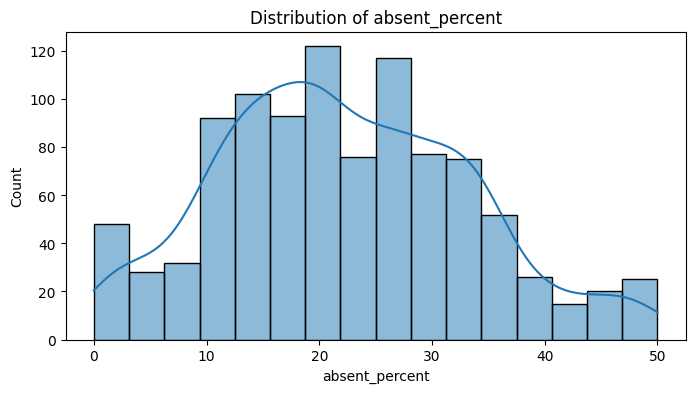

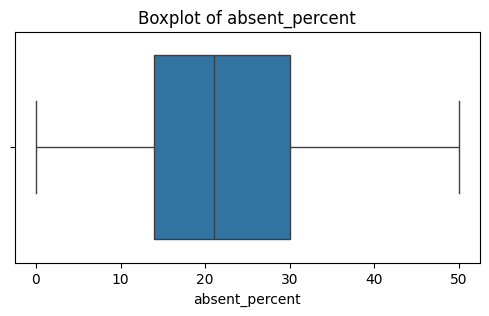

In [34]:
# for numeric columns:

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    print(f"{col} Summary:")
    print(df[col].describe())

    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Value counts for gender:
gender
female    518
male      482
Name: count, dtype: int64


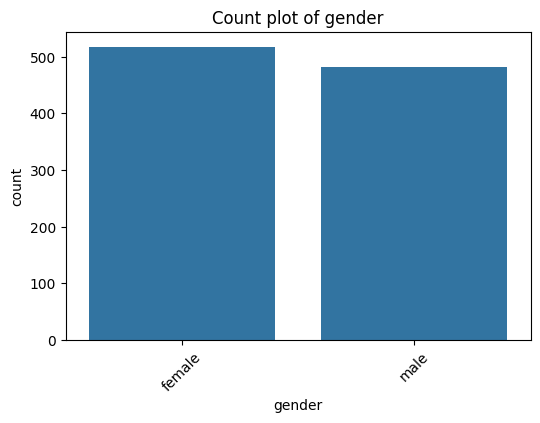

Value counts for race_ethnicity:
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


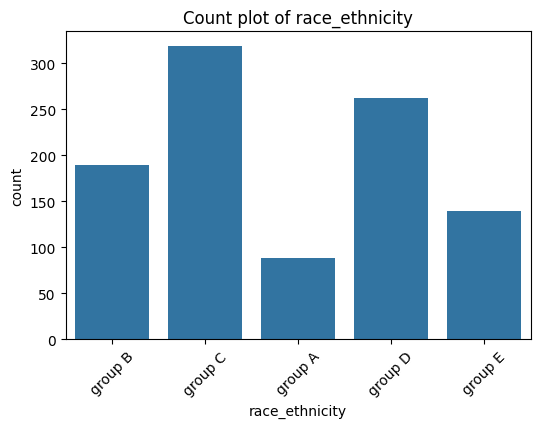

Value counts for parental_education:
parental_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


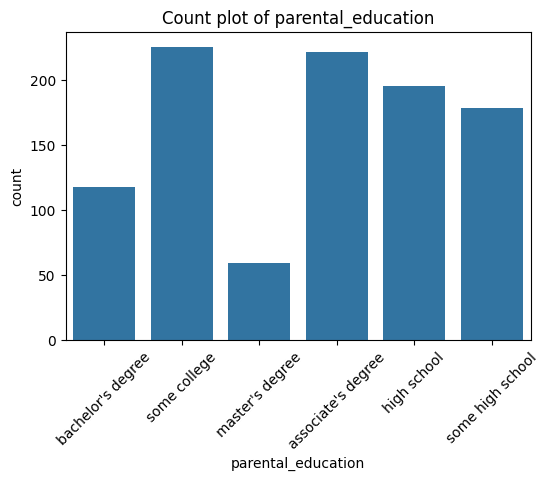

Value counts for lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64


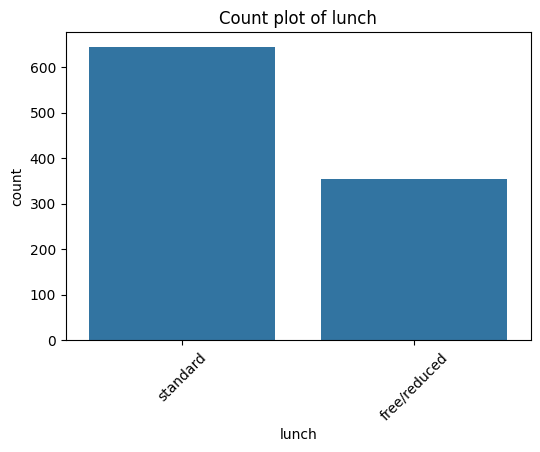

Value counts for test_preparation:
test_preparation
none         642
completed    358
Name: count, dtype: int64


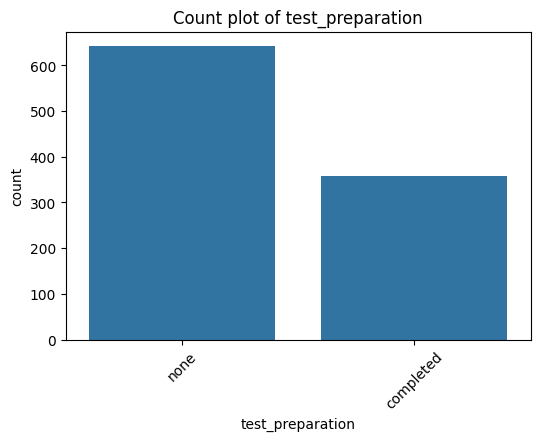

Value counts for alchol_consumption:
alchol_consumption
Moderate    532
Low         459
High          9
Name: count, dtype: int64


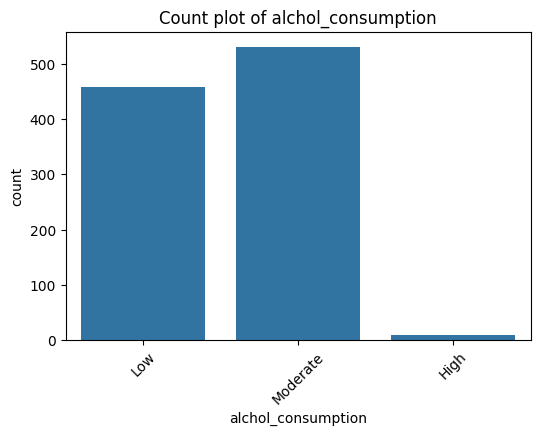

Value counts for family_support:
family_support
No     541
Yes    459
Name: count, dtype: int64


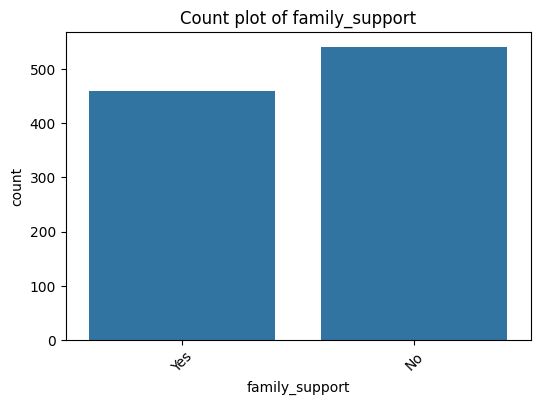

Value counts for internet_access:
internet_access
Yes    715
No     285
Name: count, dtype: int64


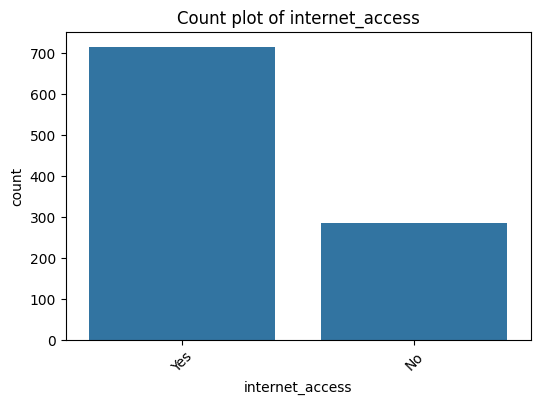

Value counts for grade:
grade
C    261
D    256
E    182
B    146
F    103
A     52
Name: count, dtype: int64


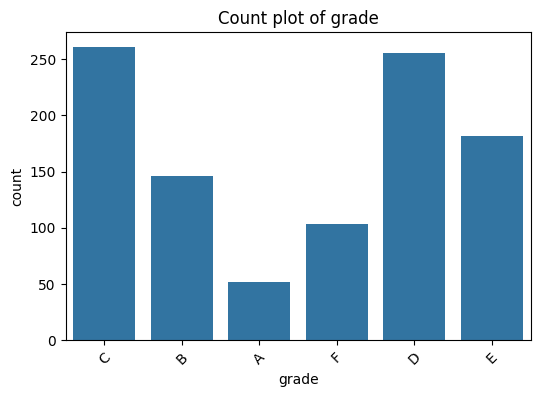

In [37]:
# for categorical columns:

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())

    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Bivariate Analysis:


\Correlation Matrix:
                    math_score  reading_score  writing_score  average_score  \
math_score            1.000000       0.817580       0.802642       0.918744   
reading_score         0.817580       1.000000       0.954598       0.970331   
writing_score         0.802642       0.954598       1.000000       0.965669   
average_score         0.918744       0.970331       0.965669       1.000000   
avg_studytime(hrs)    0.853667       0.907256       0.903056       0.933150   
absent_percent       -0.784237      -0.832608      -0.832122      -0.857860   

                    avg_studytime(hrs)  absent_percent  
math_score                    0.853667       -0.784237  
reading_score                 0.907256       -0.832608  
writing_score                 0.903056       -0.832122  
average_score                 0.933150       -0.857860  
avg_studytime(hrs)            1.000000       -0.879377  
absent_percent               -0.879377        1.000000  
The history saving thread 

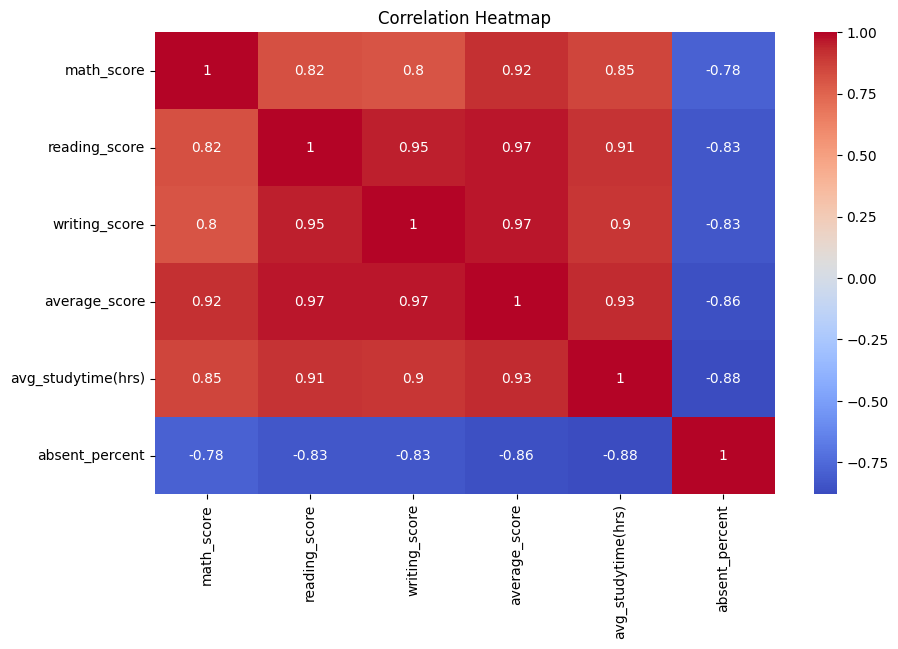

In [38]:
# Numerical vs Numerical
print("\Correlation Matrix:")
print(df[numeric_cols].corr())

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

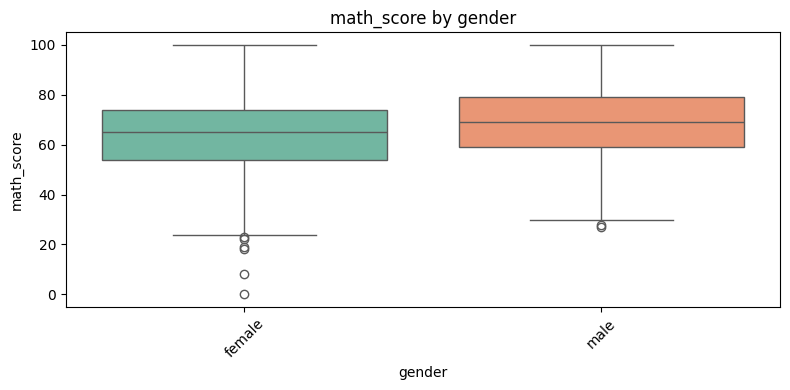

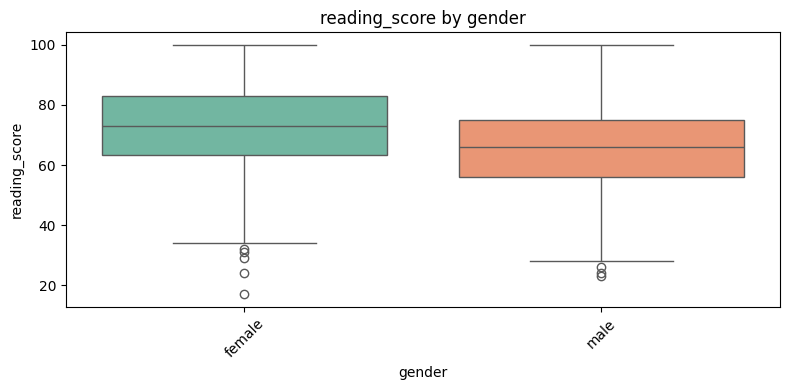

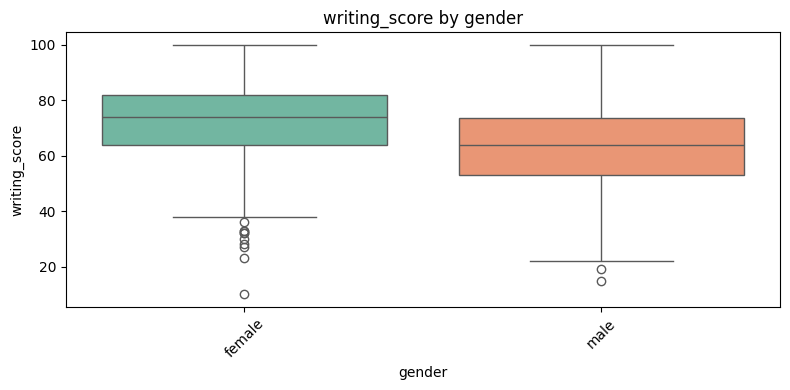

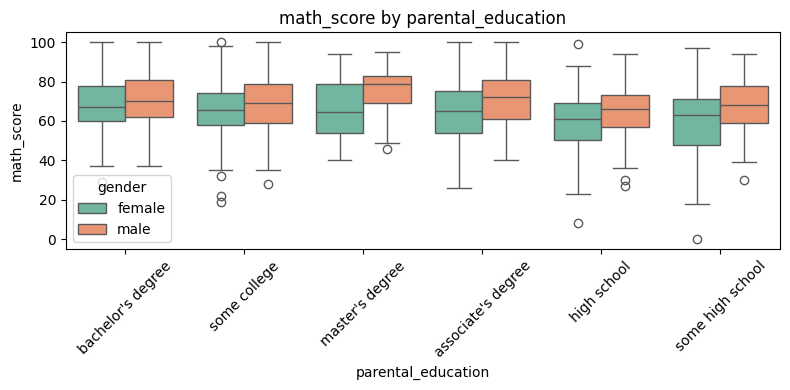

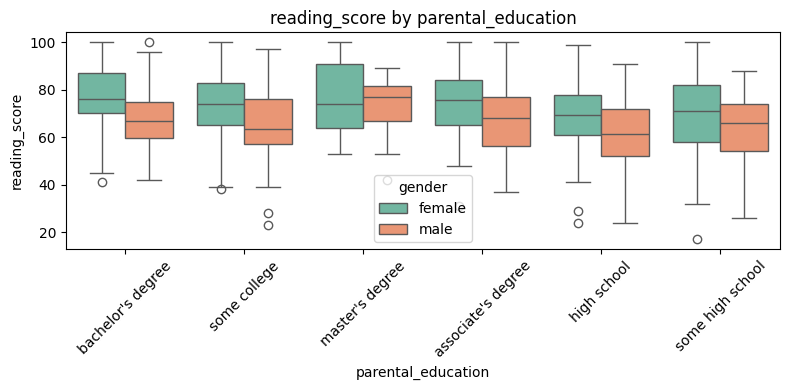

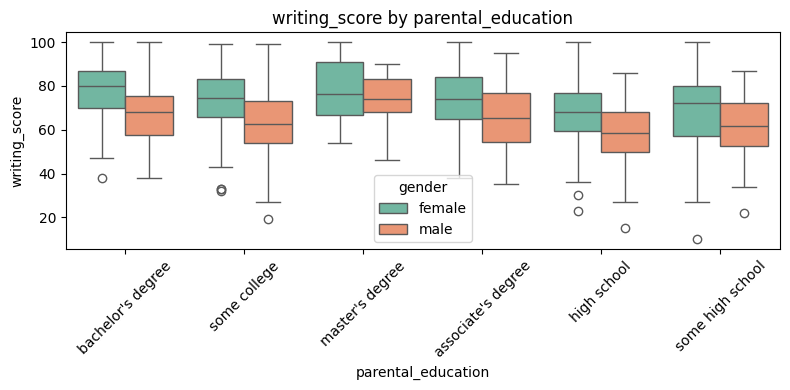

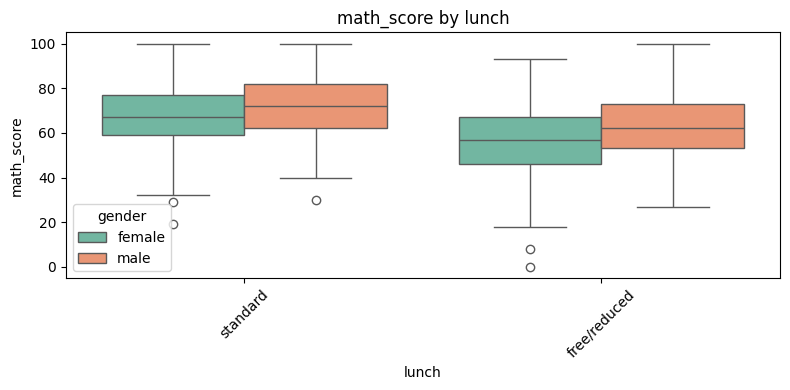

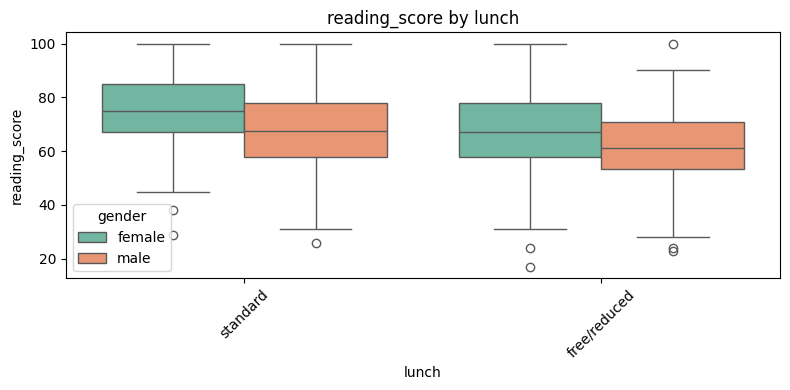

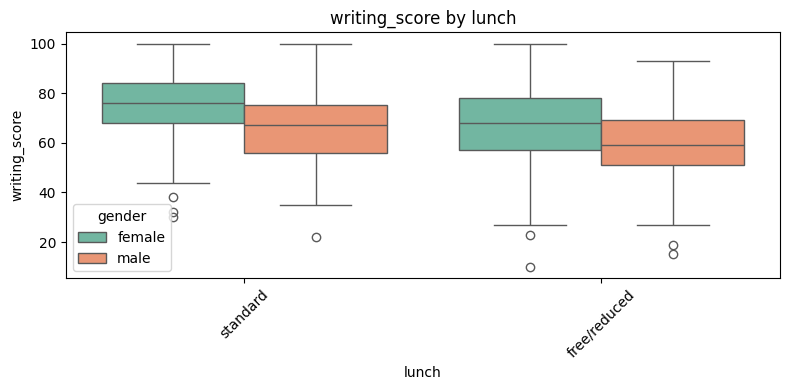

In [43]:
# Numerical vs Categorical:
selected_cats = ['gender', 'parental_education', 'lunch']
selected_nums = ['math_score', 'reading_score', 'writing_score']

for cat in selected_cats:
    for num in selected_nums:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=cat, y=num, hue='gender', data=df, palette='Set2')
        plt.title(f'{num} by {cat}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



Crosstab between gender and lunch:

lunch   free/reduced  standard
gender                        
female           189       329
male             166       316


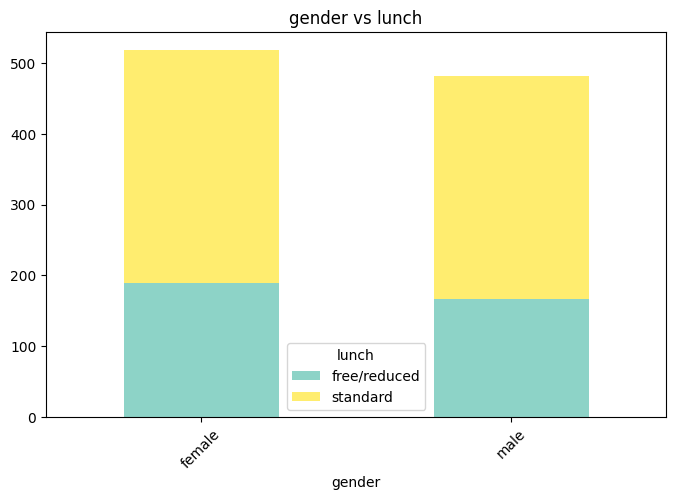


Crosstab between gender and test_preparation:

test_preparation  completed  none
gender                           
female                  184   334
male                    174   308


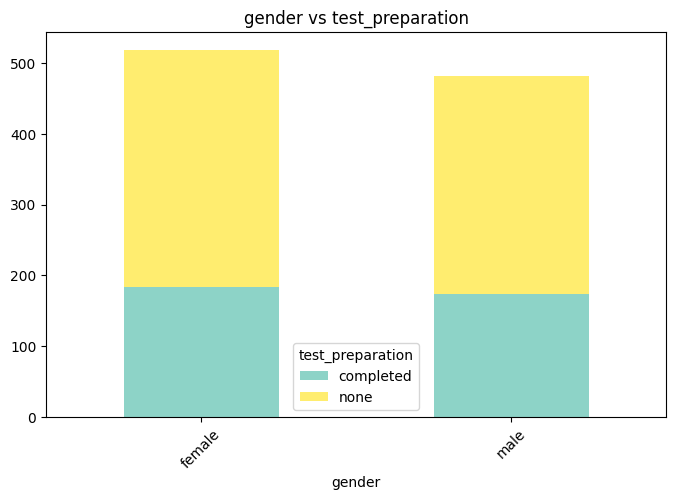


Crosstab between parental_education and race_ethnicity:

race_ethnicity      group A  group B  group C  group D  group E
parental_education                                             
associate's degree       14       41       78       50       39
bachelor's degree        12       20       40       28       18
high school              18       48       64       44       22
master's degree           3        6       19       23        8
some college             18       37       69       67       35
some high school         24       38       49       50       18


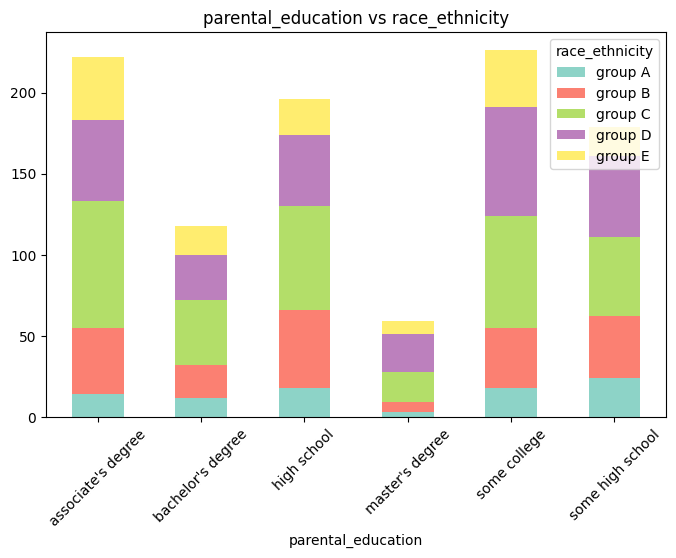


Crosstab between lunch and test_preparation:

test_preparation  completed  none
lunch                            
free/reduced            131   224
standard                227   418


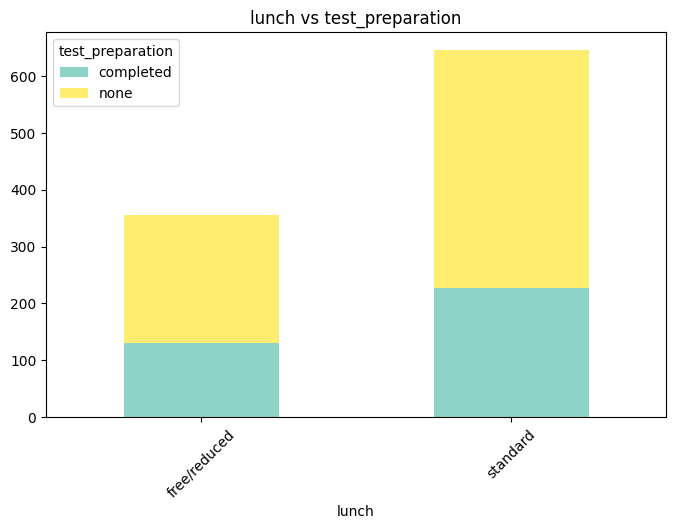

In [45]:
# Categorical vs Categorical

pairs = [
    ('gender', 'lunch'),
    ('gender', 'test_preparation'),
    ('parental_education', 'race_ethnicity'),
    ('lunch', 'test_preparation')
]

for cat1, cat2 in pairs:
    cross_tab = pd.crosstab(df[cat1], df[cat2])
    print(f"\nCrosstab between {cat1} and {cat2}:\n")
    print(cross_tab)

    cross_tab.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set3')
    plt.title(f'{cat1} vs {cat2}')
    plt.xticks(rotation=45)
    plt.show()

